In [5]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/kaggle/input/epf-etf-dataset/epf_and_etf_account_related_factors.csv')
data.head()

,Account Related Factor,2006,2007,2008,2009,2010,2011,2012,Remarks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Member Accounts (a) ('000),11326.0,11888.0,12463.0,12838.0,13413.0,13993.0,14250.0,(a) Data have been adjusted to take into accou...
2,Active Accounts (b) ('000),2073.0,2181.0,2296.0,2052.0,2165.0,2211.0,2250.0,NaN
3,Employers (Number),57996.0,61116.0,64000.0,61396.0,62295.0,64562.0,68771.0,NaN
4,Contributions (Rs. Million),33073.0,40574.0,45951.0,48712.0,54796.0,61879.0,70171.0,NaN


In [6]:
# Descriptive analysis
descriptive_stats = data.describe()


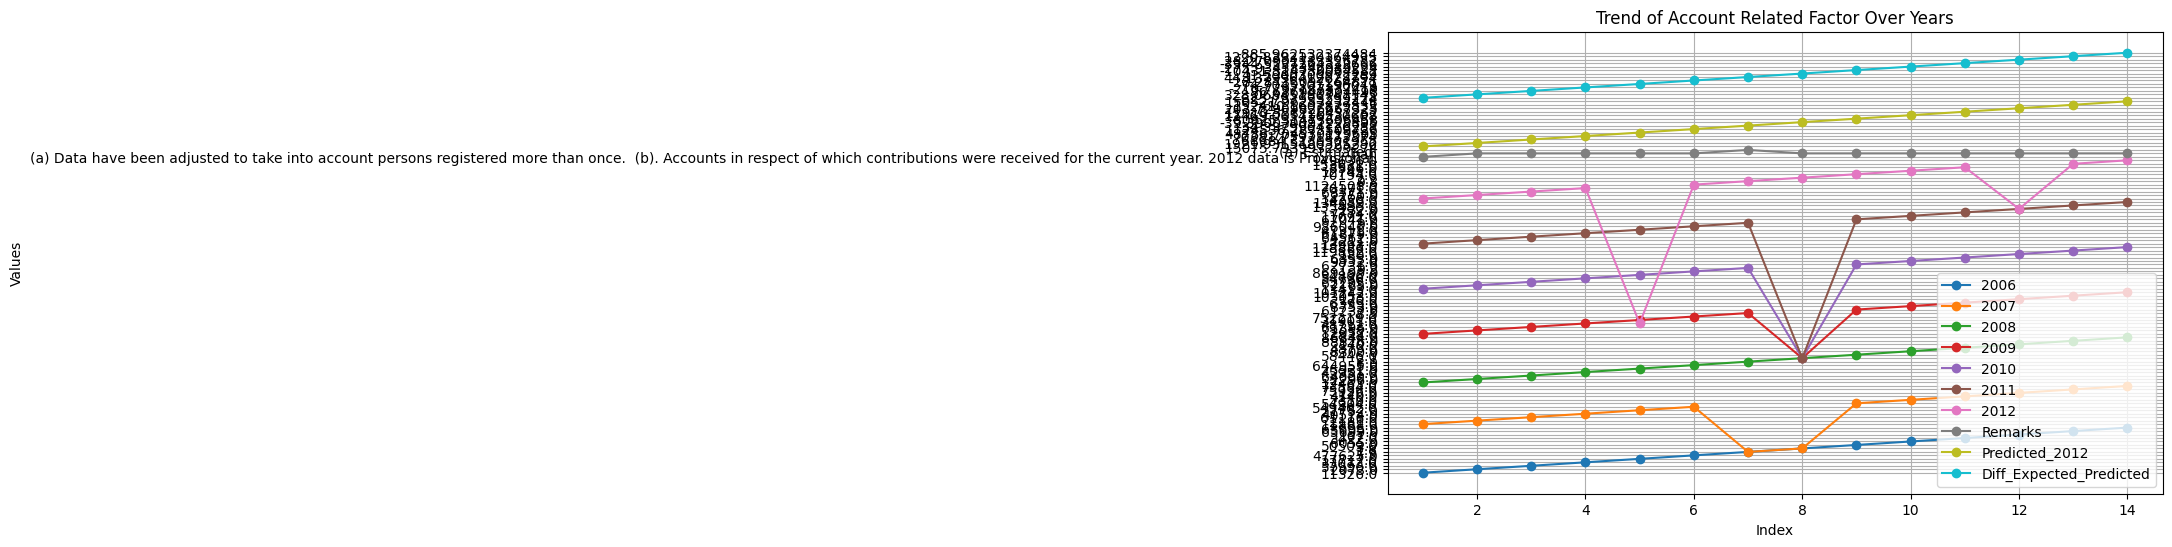

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in data.columns[1:]:
    plt.plot(np.arange(1, len(data)), data[column].iloc[1:].astype(str), marker='o', label=str(column))  # Exclude first row and convert column values to string
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Trend of Account Related Factor Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Diagnostic analysis
data_info = data.info()
missing_values = data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account Related Factor  14 non-null     object 
 1   2006                    14 non-null     float64
 2   2007                    14 non-null     float64
 3   2008                    14 non-null     float64
 4   2009                    14 non-null     float64
 5   2010                    14 non-null     float64
 6   2011                    14 non-null     float64
 7   2012                    14 non-null     float64
 8   Remarks                 2 non-null      object 
dtypes: float64(7), object(2)
memory usage: 1.2+ KB


                             2006      2007      2008      2009      2010  \
2006                     1.000000  0.999906  0.999618  0.998906  0.998237   
2007                     0.999906  1.000000  0.999888  0.999392  0.998872   
2008                     0.999618  0.999888  1.000000  0.999795  0.999467   
2009                     0.998906  0.999392  0.999795  1.000000  0.999909   
2010                     0.998237  0.998872  0.999467  0.999909  1.000000   
2011                     0.997659  0.998413  0.999136  0.999757  0.999933   
2012                     0.997334  0.998144  0.998940  0.999642  0.999891   
Predicted_2012           0.997619  0.998379  0.999104  0.999748  0.999921   
Diff_Expected_Predicted  0.050962  0.056124  0.063359  0.069205  0.076960   

                             2011      2012  Predicted_2012  \
2006                     0.997659  0.997334        0.997619   
2007                     0.998413  0.998144        0.998379   
2008                     0.999136  0.998

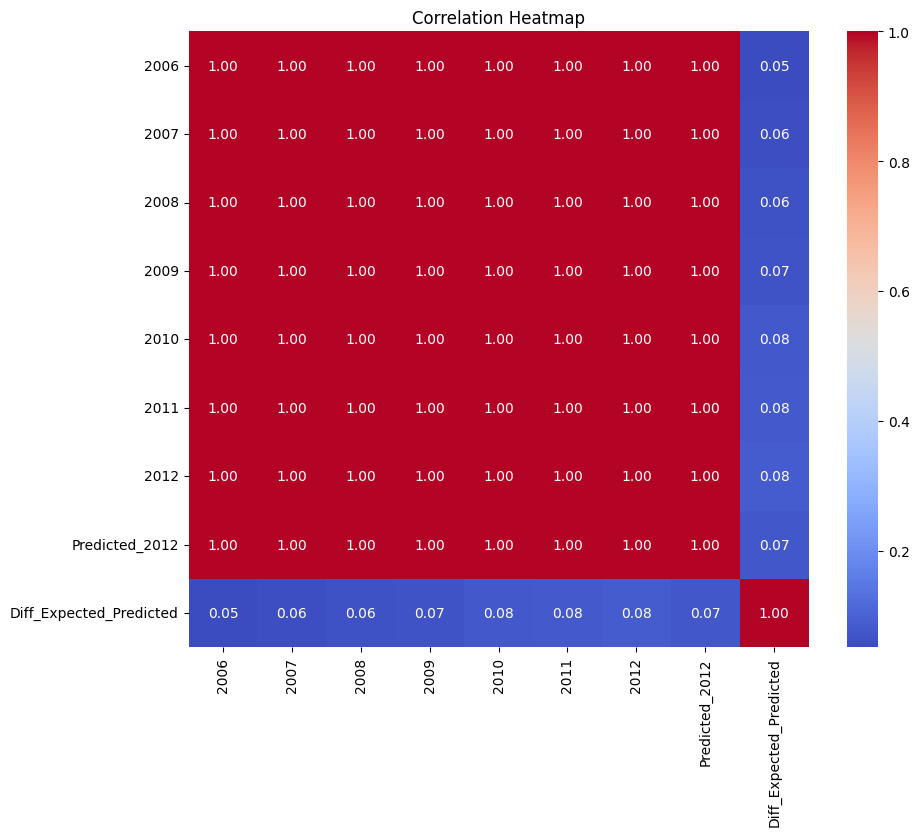

In [26]:
# Select numeric columns only
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Heatmap of correlations
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming you have already loaded your data into a DataFrame called 'data'

# Drop columns containing non-numeric data
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Split the data into features (X) and target variable (y)
X = data_imputed.drop(columns=['2012'])  # Exclude the target variable
y = data_imputed['2012']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (Linear Regression)
model = LinearRegression()

# Train the model on imputed data
model.fit(X_train, y_train)

# Predicting 2012 values using the model trained on imputed data
predictions = model.predict(X_test)


In [31]:
# Example prescriptive analysis
predicted_values = model.predict(X)  # Predict values for entire dataset
data['Predicted_2012'] = predicted_values

# Check if predicted values are lower than expected
data['Diff_Expected_Predicted'] = data['2012'] - data['Predicted_2012']
issues = data[data['Diff_Expected_Predicted'] < 0]

# Print recommendations based on issues found
if not issues.empty:
    print("Recommendations:")
    print("- Investigate factors influencing the Account Related Factor.")
    print("- Take corrective actions to address identified issues.")
else:
    print("No recommendations needed.")




Recommendations:
- Investigate factors influencing the Account Related Factor.
- Take corrective actions to address identified issues.


In [32]:
# Example: Investigating factors influencing the Account Related Factor and taking corrective actions
# Here, you might analyze coefficients from the linear regression model to identify influential factors
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Example recommendation: 
# If a certain factor has a negative coefficient, it might suggest taking corrective actions to improve that factor for better Account Related Factor.


  Feature  Coefficient
0    2006    -1.929065
1    2007    -1.557219
2    2008     1.585010
3    2009     4.520246
4    2010    -0.669095
5    2011    -0.952705
